# Interactive Compression Data Visualization
### Comparing Plain Siren, Pruned Siren,  Quantized Siren,  and Jpeg data
---

Valuable choices to get installed needed dependencies:

    conda install -c plotly plotly
    conda install -c conda-forge cufflinks-py
    pip install plotly --upgrade
    pip install cufflinks --upgrade

In [1]:
from utils.libs.std_python_libs import *
from utils.libs.data_science_libs import *
from utils.libs.graphics_and_interactive_libs import *
from utils.qat_features.create_comparing_qat_tables import create_comparing_results_table

# Extra options
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

In [42]:
root_dir = '../'
dirs = [d for d in os.listdir(root_dir) if not '.' in d]
@interact
def show_dir(dir=dirs):
    try:
        # x = subprocess.check_output(f"cd {root_dir}{dir} && ls -a -t -r -l -h", shell=True).decode()
        # x = subprocess.check_output(f"cd {root_dir}{dir} & dir", shell=True).decode("utf-8")
        x = subprocess.check_output(f"cd {root_dir}{dir} & dir", shell=True)
        print(x)
    except Exception as err:
        print(f"{str(err)}")
        pass
    pass

interactive(children=(Dropdown(description='dir', options=('analyze_a_run', 'analyze_quant_data'), value='anal…

In [3]:
# df = pd.read_csv("C:\\Users\\Francesco\\Documents\\thesys\\code\\local_projects\\siren-train-logs\\notebooks\\analyze_quant_data\\uniform_csv_files\\train_uniform_baselines.csv")
df = pd.read_csv("C:\\Users\\Francesco\\Documents\\thesys\\code\\local_projects\\siren-train-logs\\notebooks\\analyze_quant_data\\uniform_csv_files\\cmprs_df.csv")
if "Unnamed: 0" in df.columns:
    df = df.drop(["Unnamed: 0"], axis = 1)

In [4]:
df.head(5)

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2
0,1603478755-305517,-,229204.0,100.0,58.145780,27.979004,0.138523,0.000006,0.998769,Baseline:hf=75:hl=10,BASELINE
1,1603478755-305517,-,229204.0,100.0,56.492704,27.979004,0.138523,0.000009,0.998202,Baseline:hf=75:hl=10,BASELINE
2,1603478755-305517,-,229204.0,100.0,58.214385,27.979004,0.138523,0.000006,0.999085,Baseline:hf=75:hl=10,BASELINE
3,1603478755-305517,-,252004.0,100.0,53.486111,30.762207,0.125990,0.000018,0.997542,Baseline:hf=75:hl=11,BASELINE
4,1603478755-305517,-,252004.0,100.0,58.401365,30.762207,0.125990,0.000005,0.999003,Baseline:hf=75:hl=11,BASELINE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            611 non-null    object 
 1   init-from       611 non-null    object 
 2   size(byte)      611 non-null    float64
 3   footprint(%)    611 non-null    float64
 4   psnr            611 non-null    float64
 5   bpp             611 non-null    float64
 6   CR              611 non-null    float64
 7   mse             611 non-null    float64
 8   ssim            611 non-null    float64
 9   cmprss-class    611 non-null    object 
 10  cmprss-class-2  611 non-null    object 
dtypes: float64(7), object(4)
memory usage: 52.6+ KB


In [6]:
df.describe()

,size(byte),footprint(%),psnr,bpp,CR,mse,ssim
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,53357.736498,62.666594,37.692823,6.513396,3.847580,1.376545,0.884051
std,76472.460151,41.411661,11.175356,9.335017,5.908937,4.448780,0.183721
min,708.000000,4.921410,11.108531,0.086426,0.083228,0.000000,0.000000
25%,14363.000000,17.261253,30.405457,1.753296,0.536608,0.000126,0.867701
50%,14633.000000,100.000000,37.522950,1.786255,2.982901,0.001167,0.961544
75%,59168.000000,100.000000,45.377177,7.222656,4.526905,0.009718,0.990643
max,381484.000000,100.000000,65.722240,46.567871,44.844633,30.618301,0.999817


In [7]:
# set(df["cmprss-class"].values)

In [8]:
def create_cmprss_class_3(item):
    a_class, a_class_2 = item
    if a_class_2 in "AGP,BASELINE,JPEG".split(","):
        if a_class_2 == 'BASELINE': return 'SIREN'
        return a_class_2
    return a_class
def update_cmprss_class_2(item):
    a_class, a_class_2 = item
    if a_class_2 == 'BASELINE': return 'SIREN'
    return a_class_2
df["cmprss-class-3"] = list(map(create_cmprss_class_3, df[["cmprss-class", "cmprss-class-2"]].values))
df["cmprss-class-2"] = list(map(update_cmprss_class_2, df[["cmprss-class", "cmprss-class-2"]].values))

### Show interactive graphics
---

In [9]:
# df["cmprss-class-2"].iplot(kind="histogram", bins=20, theme="white", title="cmprss-class-2", xTitle='cmprss-class-2', yTitle='Count')
templates_list = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]
@interact
def scatter_plot(hist_or_pie_chart=True, x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys()),
                 template_pie=templates_list):
    with warnings.catch_warnings():
        # this will suppress all warnings in this block
        warnings.simplefilter("ignore")
        if hist_or_pie_chart:
            df["cmprss-class-2"].iplot(
                kind="histogram", bins=20,
                title="cmprss-class-2", xTitle='cmprss-class-2', yTitle='Count',
                theme=theme, colorscale=colorscale)
        else:
            occr_dict = dict(collections.Counter(df["cmprss-class-2"].values))
            keys, values = list(occr_dict.keys()), list(occr_dict.values())
            data = np.array(values)[:, np.newaxis]
            # .iplot(kind="pie", theme="white", y = "Occr")
            tmp_df = pd.DataFrame(data = data, index = keys, columns = ["Occr"])
            # tmp_df.plot.pie(y='Occr', figsize=(5, 5))

            fig = px.pie(tmp_df, values='Occr', names=tmp_df.index, template = template_pie)
            fig.show()
        pass
    pass

interactive(children=(Checkbox(value=True, description='hist_or_pie_chart'), Dropdown(description='x', options…

In [10]:
# df["cmprss-class-3"].iplot(kind="histogram", bins=20, theme="white", title="cmprss-class-2", xTitle='cmprss-class-2', yTitle='Count')
templates_list = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]
@interact
def scatter_plot(hist_or_pie_chart=True, x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys()),
                 template_pie=templates_list):
    with warnings.catch_warnings():
        # this will suppress all warnings in this block
        warnings.simplefilter("ignore")
        if hist_or_pie_chart:
            df["cmprss-class-3"].iplot(
                kind="histogram", bins=20,
                title="cmprss-class-2", xTitle='cmprss-class-2', yTitle='Count',
                theme=theme, colorscale=colorscale)
        else:
            occr_dict = dict(collections.Counter(df["cmprss-class-3"].values))
            keys, values = list(occr_dict.keys()), list(occr_dict.values())
            data = np.array(values)[:, np.newaxis]
            # .iplot(kind="pie", theme="white", y = "Occr")
            tmp_df = pd.DataFrame(data = data, index = keys, columns = ["Occr"])
            fig = px.pie(tmp_df, values='Occr', names=tmp_df.index, template = template_pie)
            fig.show()
        pass
    pass

interactive(children=(Checkbox(value=True, description='hist_or_pie_chart'), Dropdown(description='x', options…

In [11]:
qatrlq_df = df[df['cmprss-class-2'] == 'QATRLQ']['cmprss-class'].value_counts()
# siren_df = df[df['cmprss-class-2']=="SIREN"]['cmprss-class'].value_counts()
agp_df = df[df['cmprss-class-2']=="AGP"]['cmprss-class'].value_counts()
df1 = pd.DataFrame([qatrlq_df,agp_df])
df1.index = ['QATRLQ','AGP']

@interact
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    with warnings.catch_warnings():
        # this will suppress all warnings in this block
        warnings.simplefilter("ignore")
        df1.iplot(kind='bar',barmode='stack', title='Experimets by compression tech', theme=theme, colorscale=colorscale)
        pass
    pass

interactive(children=(Dropdown(description='x', options=('size(byte)', 'footprint(%)', 'psnr', 'bpp', 'CR', 'm…

In [12]:
@interact
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    with warnings.catch_warnings():
        # this will suppress all warnings in this block
        warnings.simplefilter("ignore")
        df[(df["bpp"] <= 12.0)].iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.capitalize(), yTitle=y.capitalize(),
             text='cmprss-class',
             title=f'{y.capitalize()} vs {x.capitalize()}',
            theme=theme, colorscale=colorscale, categories="cmprss-class-2")
        pass
    pass

interactive(children=(Dropdown(description='x', options=('size(byte)', 'footprint(%)', 'psnr', 'bpp', 'CR', 'm…

In [13]:
@interact
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    with warnings.catch_warnings():
        # this will suppress all warnings in this block
        warnings.simplefilter("ignore")
        df[(df["bpp"] <= 12.0)].iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.capitalize(), yTitle=y.capitalize(),
             text='cmprss-class',
             title=f'{y.capitalize()} vs {x.capitalize()}',
            theme=theme, colorscale=colorscale, categories="cmprss-class-3")
        pass
    pass

interactive(children=(Dropdown(description='x', options=('size(byte)', 'footprint(%)', 'psnr', 'bpp', 'CR', 'm…

In [14]:
# df.corr().iplot(kind='heatmap', colorscale="Blues", title="Feature Correlation Matrix")
@interact
def scatter_plot(
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    with warnings.catch_warnings():
        # this will suppress all warnings in this block
        warnings.simplefilter("ignore")
        df.corr().iplot(kind='heatmap', title="Feature Correlation Matrix", theme=theme, colorscale=colorscale,)
        pass
    pass

interactive(children=(Dropdown(description='theme', options=('ggplot', 'pearl', 'solar', 'space', 'white', 'po…

In [15]:
@interact
def correlations(column1=list(df.select_dtypes('number').columns), 
                 column2=list(df.select_dtypes('number').columns)):
    print(f"Correlation: {df[column1].corr(df[column2])}")

interactive(children=(Dropdown(description='column1', options=('size(byte)', 'footprint(%)', 'psnr', 'bpp', 'C…

In [16]:
# df[['cmprss-class-3', 'psnr']].pivot(columns='cmprss-class-3', values='psnr').iplot(kind='box')
@interact
def scatter_plot(
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    with warnings.catch_warnings():
        # this will suppress all warnings in this block
        warnings.simplefilter("ignore")
        df[['cmprss-class-3', 'psnr']].pivot(columns='cmprss-class-3', values='psnr').iplot(kind='box', theme=theme, colorscale=colorscale,)
        pass
    pass

interactive(children=(Dropdown(description='theme', options=('ggplot', 'pearl', 'solar', 'space', 'white', 'po…

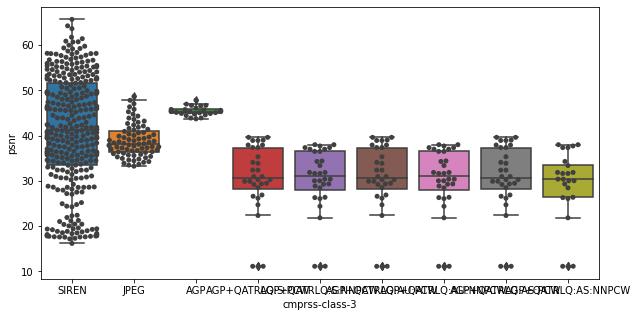

In [17]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
    _ = sns.boxplot(x="cmprss-class-3", y="psnr", data=df[['cmprss-class-3', 'psnr']], ax = ax)
    _ = sns.swarmplot(x="cmprss-class-3", y="psnr", data=df[['cmprss-class-3', 'psnr']], ax = ax, color=".25")
    pass

In [31]:
# df[['cmprss-class-3', 'bpp']].pivot(columns='cmprss-class-3', values='bpp').iplot(kind='box')
@interact
def scatter_plot(
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    with warnings.catch_warnings():
        # this will suppress all warnings in this block
        warnings.simplefilter("ignore")
        df[['cmprss-class-3', 'bpp']].pivot(columns='cmprss-class-3', values='bpp').iplot(kind='box', theme=theme, colorscale=colorscale, title = 'Bpp - Boxplot')
        pass
    pass

interactive(children=(Dropdown(description='theme', options=('ggplot', 'pearl', 'solar', 'space', 'white', 'po…

In [19]:

@interact
def plot_spread(column1=list(df.select_dtypes('number').columns), 
                 column2=list(df.select_dtypes('number').columns[1:])):
    try:
        df.iplot(kind='ratio',
             y=column1,
             secondary_y=column2,
             title=f'{column1.title()} and {column2.title()} Spread Plot',
             xTitle='Published Date')
    except: pass
    pass

interactive(children=(Dropdown(description='column1', options=('size(byte)', 'footprint(%)', 'psnr', 'bpp', 'C…

In [20]:
@interact
def scatter_plot(
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    with warnings.catch_warnings():
        # this will suppress all warnings in this block
        warnings.simplefilter("ignore")
        df[df["bpp"] <= 12.0].iplot(
            kind='bubble', x="bpp",y="psnr", categories="cmprss-class-3",
            size='size(byte)', text=list(df.columns), xTitle='bpp', yTitle='psnr',
            theme=theme, colorscale=colorscale
        )
        pass
    pass


interactive(children=(Dropdown(description='theme', options=('ggplot', 'pearl', 'solar', 'space', 'white', 'po…

### Show comparing table
---

In [21]:
baseline_data = ['2020.11.29-231149','-',20995*32/8,100.,49.16,20995*32/(256*256), (256*256*8)/(20995*32), 4.86e-5,9.96e-1,'Baseline-n_hf64-n_hl5', 'BASELINE']
columns = 'date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2'.split(",")
baseline_data_df = pd.DataFrame([baseline_data], columns = columns)
baseline_data_df

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2
0,2020.11.29-231149,-,83980.0,100.0,49.16,10.251465,0.780376,0.000049,0.996,Baseline-n_hf64-n_hl5,BASELINE


In [22]:
uniform_csv_dir = 'uniform_csv_files'
cmprs_df_csv_path = os.path.join(f"{uniform_csv_dir}", "cmprs_df.csv")

cmprs_df = pd.read_csv(cmprs_df_csv_path)
if "Unnamed: 0" in cmprs_df.columns:
    cmprs_df = cmprs_df.drop(["Unnamed: 0"], axis = 1)
cmprs_df.head(5)

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2
0,1603478755-305517,-,229204.0,100.0,58.145780,27.979004,0.138523,0.000006,0.998769,Baseline:hf=75:hl=10,BASELINE
1,1603478755-305517,-,229204.0,100.0,56.492704,27.979004,0.138523,0.000009,0.998202,Baseline:hf=75:hl=10,BASELINE
2,1603478755-305517,-,229204.0,100.0,58.214385,27.979004,0.138523,0.000006,0.999085,Baseline:hf=75:hl=10,BASELINE
3,1603478755-305517,-,252004.0,100.0,53.486111,30.762207,0.125990,0.000018,0.997542,Baseline:hf=75:hl=11,BASELINE
4,1603478755-305517,-,252004.0,100.0,58.401365,30.762207,0.125990,0.000005,0.999003,Baseline:hf=75:hl=11,BASELINE


In [23]:
baseline_df = cmprs_df[cmprs_df["cmprss-class-2"] == "Baseline".upper()]
siren_qatrlq_df = cmprs_df[(cmprs_df["cmprss-class-2"] == "QATRLQ".upper())]
siren_agp_df = cmprs_df[cmprs_df["cmprss-class-2"] == "AGP".upper()]
jpeg_df = cmprs_df[cmprs_df["cmprss-class-2"] == "Jpeg".upper()]

In [24]:
list_df = []
for gp_name, gp_data in siren_qatrlq_df.groupby(by = ['init-from']):
    psnr_max = max(gp_data["psnr"].values)
    first_row_max_psnr = gp_data[gp_data["psnr"] == psnr_max].iloc[0,:]
    list_df.append(first_row_max_psnr)
    pass
siren_qatrlq_best_df = pd.DataFrame(list_df)
siren_qatrlq_best_df.head(5).style.hide_index()

date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2
2021.01.11-183952,2020.12.11-171610,14536.000000,17.308883,38.955177,1.774414,4.508531,0.000509,0.969269,AGP+QATRLQ:S:PCW,QATRLQ
2021.01.10-230632,2020.12.12-190415,14602.000000,17.387473,34.315303,1.782471,4.488152,0.001484,0.921473,AGP+QATRLQ:S:NNPCW,QATRLQ
2021.01.12-014045,2020.12.13-232457,14547.000000,17.321981,39.641515,1.775757,4.505121,0.000435,0.971622,AGP+QATRLQ:S:PCW,QATRLQ
2021.01.12-222940,2020.12.14-174343,16489.000000,19.634437,39.044617,2.012817,3.974528,0.000499,0.970982,AGP+QATRLQ:S:PCW,QATRLQ


In [25]:
best_nth_jpge_df = jpeg_df.tail(3)
best_nth_jpge_df

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2
398,-,-,16741.0,19.934508,47.078218,2.043579,1.896541,1.274261,0.994504,JPEG:93,JPEG
399,-,-,18181.0,21.649202,47.827533,2.219360,1.746329,1.072327,0.995091,JPEG:94,JPEG
400,-,-,19863.0,23.652060,48.693716,2.424683,1.598449,0.878433,0.995725,JPEG:95,JPEG


In [26]:
tmp_jpeg_df = jpeg_df[jpeg_df["psnr"] <= max(siren_qatrlq_best_df["psnr"].values)]
best_jpeg_equal_lower_qat_data = tmp_jpeg_df.sort_values(by = ["psnr"], ascending = False).iloc[0,:]
best_jpeg_equal_lower_qat_data = pd.DataFrame([best_jpeg_equal_lower_qat_data.values], columns = best_jpeg_equal_lower_qat_data.index)
best_jpeg_equal_lower_qat_data

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2
0,-,-,8083.0,9.624911,39.587219,0.986694,3.927997,7.150864,0.980026,JPEG:68,JPEG


In [27]:
siren_agp_baselines = []
for target_date in "2020.12.11-171610,2020.12.12-190415,2020.12.13-232457".split(","):
    tmp_df = siren_agp_df[(siren_agp_df["date"] == target_date)]
    tmp_df = tmp_df[(tmp_df["footprint(%)"] == tmp_df["footprint(%)"].min())]
    siren_agp_baselines.append(tmp_df)
    pass
siren_agp_baselines = pd.concat(siren_agp_baselines, axis = 0)
siren_agp_baselines.head(5).style.hide_index()

date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2
2020.12.11-171610,2020.11.29-231149,56956.000000,67.820910,43.930189,6.952637,0.557448,0.000162,0.989889,AGP:32,AGP
2020.12.12-190415,2020.11.29-231149,52044.000000,61.971898,45.704250,6.353027,0.610061,0.000108,0.989044,AGP:38,AGP
2020.12.13-232457,2020.11.29-231149,52036.000000,61.962372,45.786802,6.352051,0.610155,0.000106,0.989081,AGP:38,AGP


In [28]:
# list_dfs = [baseline_data_df, siren_agp_baselines.iloc[0:,:], siren_qatrlq_best_df, best_nth_jpge_df.sort_values(by=["psnr"], ascending=False), best_jpeg_equal_lower_qat_data]
list_dfs = [baseline_data_df,
            siren_agp_baselines.iloc[0:,:],
            siren_qatrlq_best_df,
            best_nth_jpge_df.sort_values(by=["psnr"], ascending=False),
            best_jpeg_equal_lower_qat_data,
           ]
table_df = pd.concat(list_dfs, axis = 0, ignore_index = True)

show_columns = "date,init-from,cmprss-class,size(byte),footprint(%),psnr,bpp,CR,mse,ssim".split(",")
show_columns = "date,init-from,cmprss-class,size(byte),footprint(%),psnr,bpp,CR,ssim,delta_psnr,delta_psnr(%),delta_bpp,delta_bpp(%)".split(",")

table_df['delta_psnr'] = table_df['psnr'].values - table_df['psnr'].values[0]
table_df['delta_psnr(%)'] = (table_df['delta_psnr'].values * (-1) / table_df['psnr'].values[0]) * 100
table_df['delta_psnr(%)'][0] = 0.0

table_df['delta_bpp'] = table_df['bpp'].values - table_df['bpp'].values[0]
table_df['delta_bpp(%)'] = (table_df['delta_bpp'].values * (-1) / table_df['bpp'].values[0]) * 100
table_df['delta_bpp(%)'][0] = 0.0

formatter_dict = {'size(byte)': "{:.0f}",'ssim':'{:.3e}'}
keys = "footprint(%),psnr,bpp,CR,delta_psnr,delta_psnr(%),delta_bpp,delta_bpp(%)".split(",")
for a_key in keys:
    formatter_dict[a_key] = '{:.2f}'
table_df[show_columns]\
    .style\
    .format(formatter_dict)\
    .background_gradient(cmap='viridis').hide_index() # .highlight_max().highlight_min()
# .background_gradient(cmap='viridis')

date,init-from,cmprss-class,size(byte),footprint(%),psnr,bpp,CR,ssim,delta_psnr,delta_psnr(%),delta_bpp,delta_bpp(%)
2020.11.29-231149,-,Baseline-n_hf64-n_hl5,83980,100.00,49.16,10.25,0.78,9.960e-01,0.00,0.00,0.00,0.00
2020.12.11-171610,2020.11.29-231149,AGP:32,56956,67.82,43.93,6.95,0.56,9.899e-01,-5.23,10.64,-3.30,32.18
2020.12.12-190415,2020.11.29-231149,AGP:38,52044,61.97,45.70,6.35,0.61,9.890e-01,-3.46,7.03,-3.90,38.03
2020.12.13-232457,2020.11.29-231149,AGP:38,52036,61.96,45.79,6.35,0.61,9.891e-01,-3.37,6.86,-3.90,38.04
2021.01.11-183952,2020.12.11-171610,AGP+QATRLQ:S:PCW,14536,17.31,38.96,1.77,4.51,9.693e-01,-10.20,20.76,-8.48,82.69
2021.01.10-230632,2020.12.12-190415,AGP+QATRLQ:S:NNPCW,14602,17.39,34.32,1.78,4.49,9.215e-01,-14.84,30.20,-8.47,82.61
2021.01.12-014045,2020.12.13-232457,AGP+QATRLQ:S:PCW,14547,17.32,39.64,1.78,4.51,9.716e-01,-9.52,19.36,-8.48,82.68
2021.01.12-222940,2020.12.14-174343,AGP+QATRLQ:S:PCW,16489,19.63,39.04,2.01,3.97,9.710e-01,-10.12,20.58,-8.24,80.37
-,-,JPEG:95,19863,23.65,48.69,2.42,1.60,9.957e-01,-0.47,0.95,-7.83,76.35
-,-,JPEG:94,18181,21.65,47.83,2.22,1.75,9.951e-01,-1.33,2.71,-8.03,78.35


In [29]:
metadata_table = dict(
    table_df=table_df,
    show_columns="date,init-from,cmprss-class,size(byte),footprint(%),psnr,bpp,CR,ssim,delta_psnr,delta_psnr(%),delta_bpp,delta_bpp(%)".split(","),
    delta_columns="footprint(%),psnr,bpp,CR,delta_psnr,delta_psnr(%),delta_bpp,delta_bpp(%)".split(","),
    formatter_dict=formatter_dict,
    extend_formatter_keys="footprint(%),psnr,bpp,CR,delta_psnr,delta_psnr(%),delta_bpp,delta_bpp(%)".split(",")
)
cmap_list = "'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'"
cmap_list = [item.strip(" ").strip("''") for item in cmap_list.split(",")]
@interact
def scatter_plot(hide_index=True, hide_date_init_from=False, enable_cmap=True, show_deltas=True, cmap=cmap_list):
    with warnings.catch_warnings():
        # this will suppress all warnings in this block
        warnings.simplefilter("ignore")
        metadata_table['hide_index'] = hide_index
        metadata_table['cmap'] = cmap
        metadata_table['enable_cmap'] = enable_cmap
        metadata_table["show_deltas"] = show_deltas
        metadata_table["hide_date_init_from"] = hide_date_init_from
        resulting_table_df = create_comparing_results_table(**metadata_table)
        display(resulting_table_df)
    pass

interactive(children=(Checkbox(value=True, description='hide_index'), Checkbox(value=False, description='hide_…

In [30]:
data = table_df.iloc[1:,:][show_columns].mean()
# pd.DataFrame([data], columns = data.index)
columns = list(map(lambda item: f"AVG-{item}", list(data.index)))
pd.DataFrame([data.values], columns = columns)

,AVG-size(byte),AVG-footprint(%),AVG-psnr,AVG-bpp,AVG-CR,AVG-ssim,AVG-delta_psnr,AVG-delta_psnr(%),AVG-delta_bpp,AVG-delta_bpp(%)
0,25825.272727,30.751694,42.778594,3.152499,2.583937,0.978791,-6.381406,12.98089,-7.098966,69.248306


## References

- [Interactive Plots with Plotly and Cufflinks on Pandas Dataframes](https://medium.com/@ozan/interactive-plots-with-plotly-and-cufflinks-on-pandas-dataframes-af6f86f62d94)

- [Interactive Controls in Jupyter Notebooks](https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6)